<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_new_data_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [5]:
# Data from Excel
file_path = '/content/logs_CAD_2024_new.xlsx'
data = pd.read_excel(file_path)

In [26]:
display(pd.DataFrame(data))

,user,log_lesson,logs_practice,logs,mother_tongue,gender,age,grade
0,26604,184,193,377,0,1,23,4
1,26610,77,65,142,1,1,21,0
2,26563,120,216,336,1,1,21,4
3,26544,259,214,473,1,1,21,5
4,26760,192,269,461,1,0,22,5
5,26789,31,156,187,1,1,22,0
6,26864,41,61,102,0,1,22,0
7,23558,0,93,93,1,0,22,0
8,26861,199,293,492,0,1,21,3
9,29684,134,114,248,1,1,22,4


from matplotlib import pyplot as plt
_df_0['user'].plot(kind='hist', bins=20, title='user')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['log_lesson'].plot(kind='hist', bins=20, title='log_lesson')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['logs_practice'].plot(kind='hist', bins=20, title='logs_practice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['logs'].plot(kind='hist', bins=20, title='logs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='user', y='log_lesson', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='log_lesson', y='logs_practice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='logs_practice', y='logs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='logs', y='mother_tongue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['user'].plot(kind='line', figsize=(8, 4), title='user')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['log_lesson'].plot(kind='line', figsize=(8, 4), title='log_lesson')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['logs_practice'].plot(kind='line', figsize=(8, 4), title='logs_practice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['logs'].plot(kind='line', figsize=(8, 4), title='logs')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
X = data.drop('grade', axis=1).values
y = data['grade'].values

In [7]:
# Ensure target values are 0 or 1
y = (y == 1).astype(float)

In [8]:
#  Preprocess Data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [11]:
# Define the Model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x


In [12]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [13]:
#  Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
# Train the Model
num_epochs = 100
training_losses = []
validation_losses = []

In [15]:
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.5539, Val Loss: 0.4274
Epoch [20/100], Loss: 0.4122, Val Loss: 0.2674
Epoch [30/100], Loss: 0.2845, Val Loss: 0.1544
Epoch [40/100], Loss: 0.1792, Val Loss: 0.0834
Epoch [50/100], Loss: 0.1055, Val Loss: 0.0457
Epoch [60/100], Loss: 0.0612, Val Loss: 0.0265
Epoch [70/100], Loss: 0.0367, Val Loss: 0.0166
Epoch [80/100], Loss: 0.0235, Val Loss: 0.0113
Epoch [90/100], Loss: 0.0161, Val Loss: 0.0082
Epoch [100/100], Loss: 0.0118, Val Loss: 0.0063


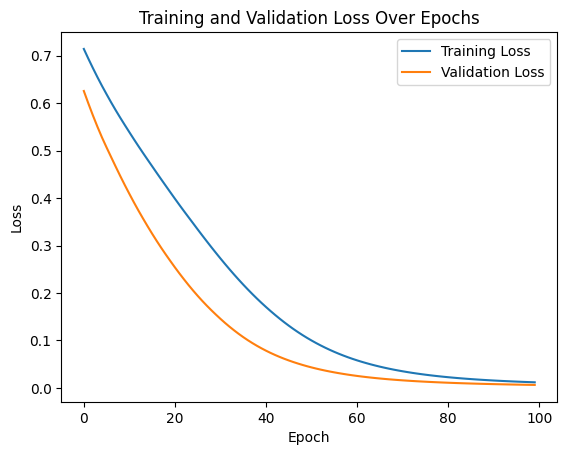

In [16]:
# Plot the losses
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [17]:
# Evaluate the Model
model.eval()
with torch.no_grad():
    y_predicted = model(X_test).round()

In [18]:
# Check unique values in y_predicted
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0.])


In [19]:
# Ensure y_test is correctly shaped for sklearn's classification_report
y_test_flat = y_test.flatten()

In [20]:
# If only one class is predicted, avoid using classification_report
if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

Only one class (0.0) predicted. Cannot generate classification report.


In [21]:
# Check Data Distribution
print(pd.Series(y_train.numpy().flatten()).value_counts())

0.0    13
Name: count, dtype: int64


In [22]:
# Inspect Model Predictions
with torch.no_grad():
    raw_outputs = model(X_test)
    print(raw_outputs[:10])  # Print the first 10 outputs

tensor([[0.0180],
        [0.0026],
        [0.0040],
        [0.0004]])


In [23]:
# djust Classification Threshold
threshold = 0.3  # Adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([0.])
Only one class (0.0) predicted with threshold 0.3.


In [24]:
# Review and Improve Model Architecture
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

model = ImprovedNN(input_dim)

Epoch [10/100], Loss: 0.6095, Val Loss: 0.5951
Epoch [20/100], Loss: 0.3822, Val Loss: 0.3491
Epoch [30/100], Loss: 0.1423, Val Loss: 0.1108
Epoch [40/100], Loss: 0.0338, Val Loss: 0.0221
Epoch [50/100], Loss: 0.0087, Val Loss: 0.0051
Epoch [60/100], Loss: 0.0034, Val Loss: 0.0019
Epoch [70/100], Loss: 0.0019, Val Loss: 0.0011
Epoch [80/100], Loss: 0.0013, Val Loss: 0.0007
Epoch [90/100], Loss: 0.0010, Val Loss: 0.0006
Epoch [100/100], Loss: 0.0008, Val Loss: 0.0005


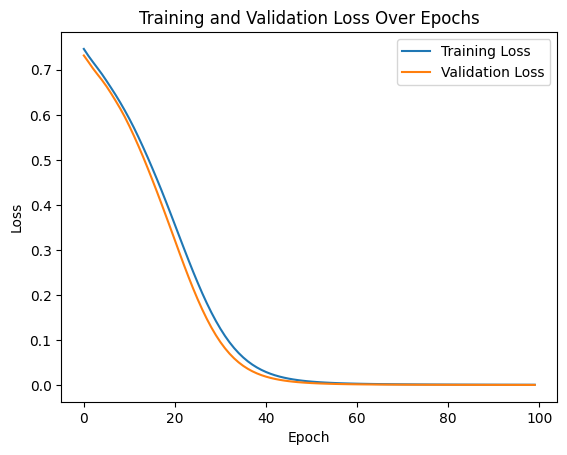

Raw outputs (first 10): tensor([9.9096e-04, 2.2839e-04, 5.9345e-04, 2.8620e-05])
Unique values in predictions with threshold 0.3: tensor([0.])
Only one class (0.0) predicted with threshold 0.3.


In [25]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Load Data from Excel
file_path = '/content/logs_CAD_2024_new.xlsx'
data = pd.read_excel(file_path)

# Assuming your Excel file has columns 'features' and 'target'
X = data.drop('grade', axis=1).values
y = data['grade'].values

# Ensure target values are 0 or 1
y = (y == 1).astype(float)

# Step 2: Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Step 3: Define the Model
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x

input_dim = X_train.shape[1]
model = ImprovedNN(input_dim)

# Step 4: Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the Model
num_epochs = 100
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Step 6: Evaluate the Model
model.eval()
with torch.no_grad():
    raw_outputs = model(X_test)
    print(f'Raw outputs (first 10): {raw_outputs[:10].flatten()}')

    # Adjust threshold if necessary
    threshold = 0.3
    y_predicted = (raw_outputs > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

    y_test_flat = y_test.flatten()
    if len(unique_values) == 1:
        print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
    else:
        print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))